**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

## Excercise 1 ---------------------------------
#### KNN

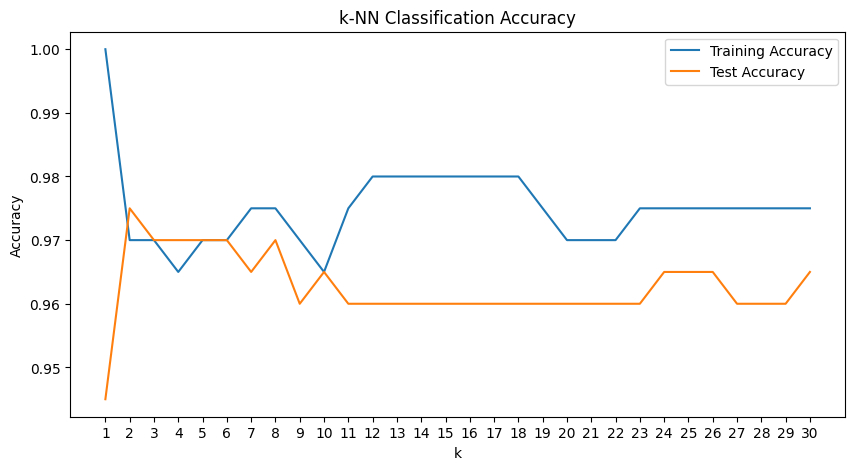

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
Dataset1 = h5py.File('Lab1_Ex_1_Synthtetic.hdf5', 'r')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200, :]
Test_Set = Data[200:, :]
#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:
#   - Taking a sample 
#   - Computing all the distances between the sample element and the elements of the training set
#   - sort the the training set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - select the top k elements in terms of distance
#   - evaluate to which class the majority of these k elements belongs to (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)


def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def k_nn_classifier(sample, myData, k):
    distances = []
    for data_point in myData:
        distances.append((euclidean_distance(sample[:-1], data_point[:-1]), data_point[-1]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    # print(neighbors)
    classes, counts = np.unique([neighbor[-1] for neighbor in neighbors], return_counts=True)
    # print(classes, counts)
    return classes[np.argmax(counts)]

# Loop over different values of k and compute accuracies
train_accuracies = []
test_accuracies = []
ks = range(1, 31)  # Assuming you want to test k from 1 to 20
for k in ks:
    correct_train = 0
    correct_test = 0
    
    # Evaluate on training set
    for sample in Train_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_train += 1
            
    # Evaluate on test set
    for sample in Test_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_test += 1
    
    train_accuracies.append(correct_train / len(Train_Set))
    test_accuracies.append(correct_test / len(Test_Set))

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(ks, train_accuracies, label='Training Accuracy')
plt.plot(ks, test_accuracies, label='Test Accuracy')
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('k-NN Classification Accuracy')
plt.show()

## Comment On Ex1
##### we implemented an Euclidian Distance calculator which is used to calculated the distance between each single point (sample point with respect to train datapoints), this distance will be used in KNN classifier, distances are sorted and k-first elements are taken and then ArgMax is called over the ksamples which will return the most frequent class among the samples.
##### this ArgMax result is the prediction of label for the new sample, we assign the label as y_pred. then to calculate the accuracy we compare true y_preds to actual values of labels then we count them and divide by the total predictions(is equal to test size), this will give us the accuray of our prediction method.
##### for k=1 -> we will observe a bad prediction due to overfit on the training data since we have few training data, as we increase the number of k the accuracy of training set will decrease while the accuracy of test set increases, this is due to variablity in models brahviour, the suitable value of k needs some fine tuning, if k becomes too large then the  the model is too simplistic and fails to capture local variations in the data, and too generalized, this might cause underfitting over the training set and poor results for the predictions

## Excercise 2 ---------------------------------
#### Wine Testing using Linear Regression

In [9]:
#Change the path to match the position of your file
#The Dataset can be loaded using thhe file option in Google Colab (the directory icon on the left)
Dataset1 = h5py.File('Lab1_Ex_1_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

**Student's comments to exercise 1**

*Add comments to the results of Exercise 1 here (may use LateX for formulas if needed).*

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

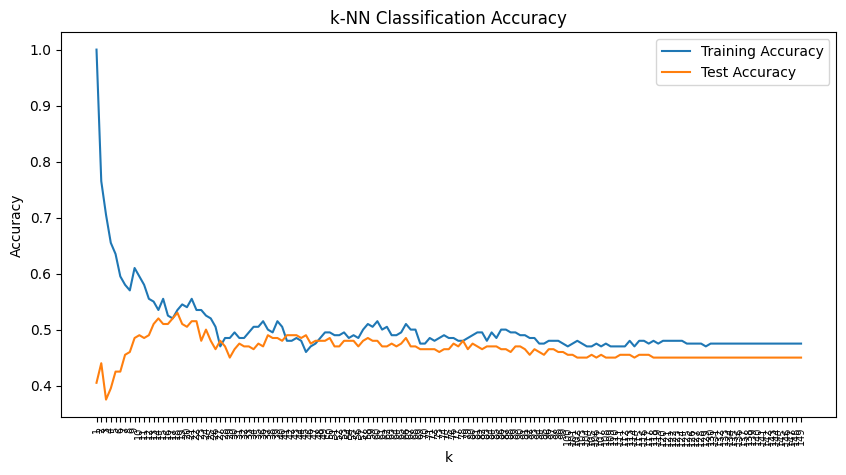

In [ ]:
#Part 1

Dataset2 = h5py.File('Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))
np.random.shuffle(Data)

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

#Part 1

# Loop over different values of k and compute accuracies
train_accuracies = []
test_accuracies = []
ks = range(1, 150)  # Assuming you want to test k from 1 to 30
for k in ks:
    correct_train = 0
    correct_test = 0
    
    # Evaluate on training set
    for sample in Train_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_train += 1
            
    # Evaluate on test set
    for sample in Test_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_test += 1
    
    train_accuracies.append(correct_train / len(Train_Set))
    test_accuracies.append(correct_test / len(Test_Set))

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(ks, train_accuracies, label='Training Accuracy')
plt.plot(ks, test_accuracies, label='Test Accuracy')
plt.xticks(ks, rotation=90, fontsize=7)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('k-NN Classification Accuracy')
plt.show()
#To be completed by the student

## Comment On Ex2
##### - since we have different value ranges for different features we need to normalize data to avoid giving higher weights to higher ranges and vice-versa
##### - the value of parameter k indicated the number of neighbours, if we say that test accuracy is lower than 50 while there is a high accuracy for train set we would say we have overfitting which is memorizing the training data and failing to predict the true values for test data, in this case approximately for values under 26 we see the pattern but it is at it's highest at the lower values of k. underfitting is happening for the values over k=50 and system fails to underestand the actual patterns and classes in the data due to over generalization.
##### - Regression is used to predict a value in continuous series of data, we can use regression for the classification problems if we ignore the floating part of the result and treat the result as a class label (as discrete values). inn our case the accuracy was poor as so maybe it is not the best choise to use regression for classification.

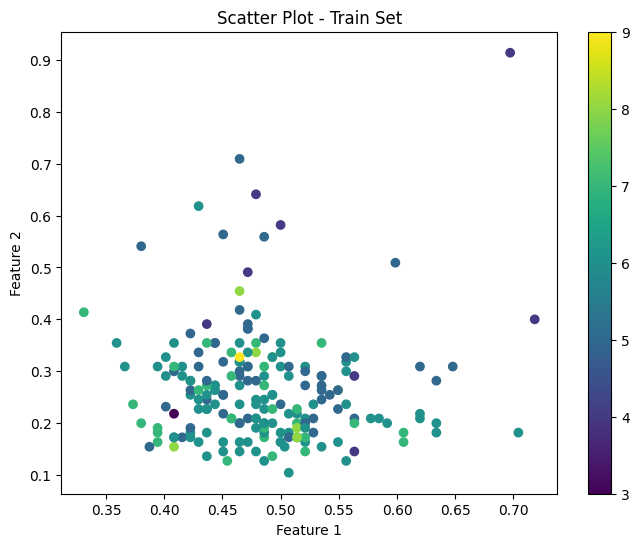

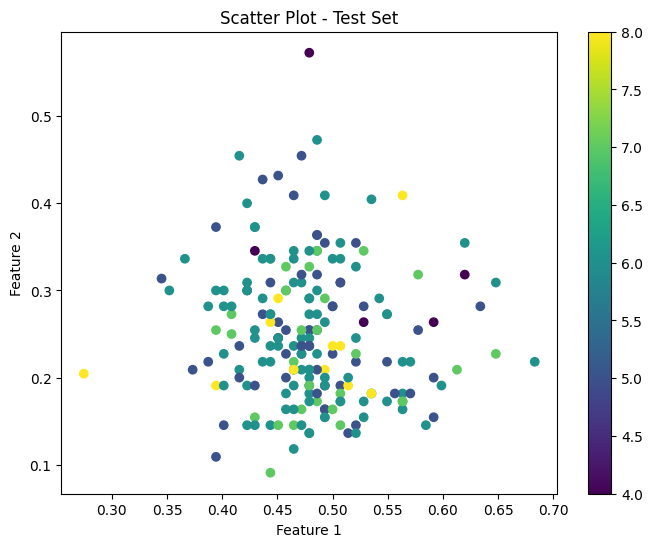

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for train set
plt.figure(figsize=(8, 6))
plt.scatter(Train_Set[:, 0], Train_Set[:, 1], c=Train_Set[:, -1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot - Train Set')
plt.colorbar()
plt.show()

# Scatter plot for test set
plt.figure(figsize=(8, 6))
plt.scatter(Test_Set[:, 0], Test_Set[:, 1], c=Test_Set[:, -1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot - Test Set')
plt.colorbar()
plt.show()


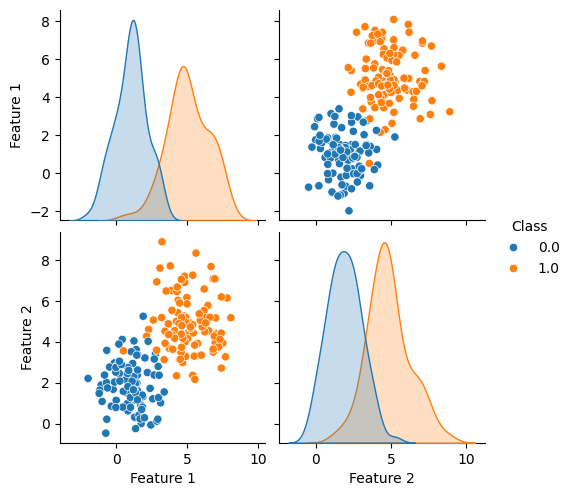

In [3]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(Train_Set, columns=['Feature 1', 'Feature 2', 'Class']), hue='Class')

In [5]:
#Part 2
from sklearn import linear_model
clf = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Dataset2 = h5py.File('Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))
np.random.shuffle(Data)

# Split dataset

X_train = Data[:300, :-1]
y_train = Data[:300, -1]
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)


X_test = Data[100:, :-1]
y_test = Data[100:, -1]
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Train linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred)

# Evaluate model on training set
x_pred = regressor.predict(X_train)
x_pred = np.round(x_pred)

# # Evaluate model
def myAccuracy(y_true, y_pred):
    accuracy = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            accuracy += 1
    accuracy /= len(y_true)
    return accuracy

test_acc = myAccuracy(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test MSE: {mse}')
# Evaluate model on training set
train_acc = myAccuracy(y_train, x_pred)
mse = mean_squared_error(y_train, x_pred)
print(f'Train Accuracy: {train_acc * 100:.2f}%')
print(f'Train MSE: {mse}')

(300, 11) (300,) (300, 11) (300,)
Test Accuracy: 46.00%
Test MSE: 0.69
Train Accuracy: 52.00%
Train MSE: 0.6266666666666667


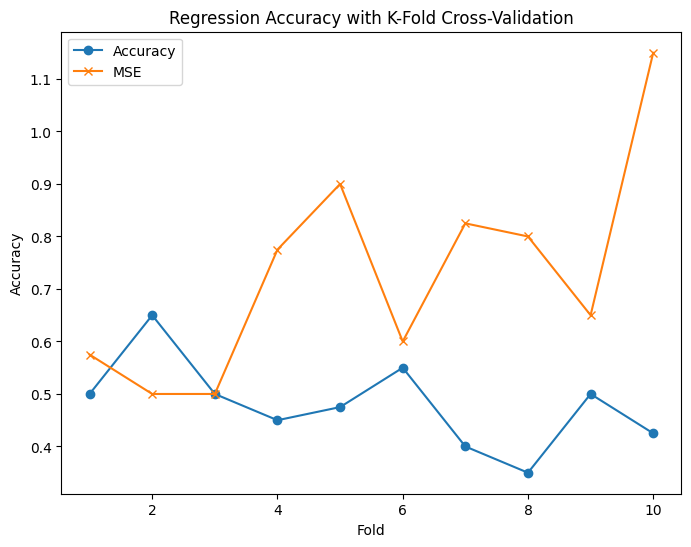

Fold 1: ACC:50.00% - MSE:0.575, | Train ACC:50.00%
Fold 2: ACC:65.00% - MSE:0.5, | Train ACC:48.06%
Fold 3: ACC:50.00% - MSE:0.5, | Train ACC:50.28%
Fold 4: ACC:45.00% - MSE:0.775, | Train ACC:50.00%
Fold 5: ACC:47.50% - MSE:0.9, | Train ACC:50.00%
Fold 6: ACC:55.00% - MSE:0.6, | Train ACC:48.33%
Fold 7: ACC:40.00% - MSE:0.825, | Train ACC:49.72%
Fold 8: ACC:35.00% - MSE:0.8, | Train ACC:51.67%
Fold 9: ACC:50.00% - MSE:0.65, | Train ACC:49.72%
Fold 10: ACC:42.50% - MSE:1.15, | Train ACC:50.00%


In [7]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Dataset2 = h5py.File('Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))
np.random.shuffle(Data)
# Split dataset
X = Data[:, :-1]
y = Data[:, -1]
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True)

accuracies = []
mse_values = []
train_accuracies = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Train linear regression model
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

  # Make predictions on training set
  y_pred_train = regressor.predict(X_train)
  y_pred_train = np.round(y_pred_train)

  # Make predictions
  y_pred = regressor.predict(X_test)
  y_pred = np.round(y_pred)

  # Evaluate model
  accuracy = np.sum(y_pred == y_test) / len(y_test)
  accuracies.append(accuracy)

  train_acc = np.sum(y_pred_train == y_train) / len(y_train)
  train_accuracies.append(train_acc)

  mse = mean_squared_error(y_test, y_pred)
  mse_values.append(mse)

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, k+1), accuracies, marker='o')
plt.plot(range(1, k+1), mse_values, marker='x')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Regression Accuracy with K-Fold Cross-Validation')
plt.legend(['Accuracy', 'MSE'])
plt.show()

for i in range(10):
    print(f'Fold {i+1}: ACC:{accuracies[i] * 100:.2f}% - MSE:{mse_values[i]}, | Train ACC:{train_accuracies[i] * 100:.2f}%')

**Student's comments to exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

## Excercise 3 ---------------------------------
#### Speech Signals

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

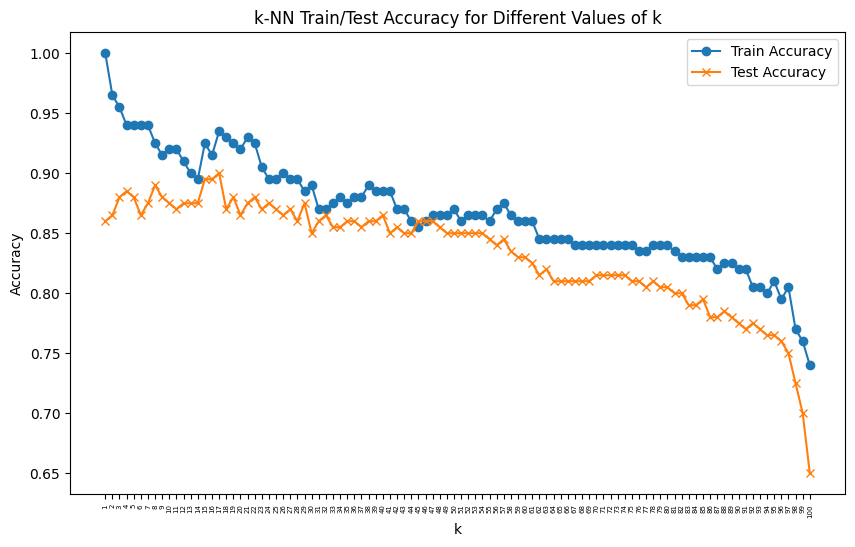

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Dataset3 = h5py.File('Lab1_Ex_3.hdf5')

Data = np.array(Dataset3.get('Dataset'))
np.random.shuffle(Data)

# Assume phoneme_dataset is already loaded with proper format
# phoneme_dataset = ... # You should load your dataset here

# Split dataset into features and labels
Train_Set = Data[:200, :]
Test_Set = Data[200:, :]

# Test different values of k
train_accuracies = []
test_accuracies = []
ks = range(1, 101)  # Assuming you want to test k from 1 to 30
for k in ks:
    correct_train = 0
    correct_test = 0
    
    # Evaluate on training set
    for sample in Train_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_train += 1
            
    # Evaluate on test set
    for sample in Test_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_test += 1
    
    train_accuracies.append(correct_train / len(Train_Set))
    test_accuracies.append(correct_test / len(Test_Set))
  

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ks, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(ks, test_accuracies, label='Test Accuracy', marker='x')
plt.title('k-NN Train/Test Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(ks, rotation=90, fontsize=5)
plt.show()

## Comment On Ex3

##### - in this exercise the data had 256 features, caluculating the distance for each point is a complicated and computationally heavy process which took longer time to be done
##### - as it can be seen as we increase the value of k the train accuracy decreases and test accuracy increases and we need to find an optimal value for k in this range.
##### - the lower the value of k the more overfitting over train data and the larger the value of k the lower the accuracy for both train and test sets, since there is a higher number of features and higher number of neighbours resulting in random assignements
##### - low k -> too granular - capturing false patterns
##### - large k -> too generalized - ignoring actual existing patterns